## Fig.3.B Generalization Examples

In [8]:
import json

# 文件路径配置
images_txt_path = 'datasets/trials/gen_example.txt'
json_file_path = 'datasets/trials/object_img_5_3_42.json'
output_json_path = 'datasets/trials/filtered_output_with_consistent_counters.json'

# 读取图片列表
with open(images_txt_path, 'r') as file:
    images = [line.strip() for line in file]

# 读取 JSON 数据
with open(json_file_path, 'r') as file:
    data = json.load(file)

# 初始化一个新列表来存储过滤后的数据
filtered_data = []

# 创建字典来跟踪每张图片的 `target_category` 编号
image_counters = {}
category_counter = 1  # 用于为每个新图片类别分配新的编号

# 过滤数据
for image_path in images:
    if image_path not in image_counters:  # 如果这是我们第一次看到这张图片
        image_counters[image_path] = category_counter
        category_counter += 1  # 为下一个新的图片类别准备编号

    # 为当前图片应用已确定的编号
    for item in data:
        if item["target_img_filename"] == image_path:
            new_item = item.copy()
            category_prefix = new_item["target_category"].rstrip('0123456789')  # 去除可能存在的数字
            new_item["target_category"] = f"{category_prefix}{image_counters[image_path]}"
            filtered_data.append(new_item)

# 保存过滤并更新后的数据到新的 JSON 文件
with open(output_json_path, 'w') as file:
    json.dump(filtered_data, file, indent=4)

print(f"Filtered data with consistent counters saved to {output_json_path}")

Filtered data with consistent counters saved to datasets/trials/filtered_output_with_consistent_counters.json


In [2]:
import matplotlib.pyplot as plt
import json

with open('results/trial_08-20_02:44.json', 'r') as file:
    results = json.load(file)
    results = results['class_accuracy']
print(results)

{'butterfly1': 0.8, 'butterfly2': 0.8, 'butterfly3': 0.0, 'butterfly4': 0.0, 'bucket5': 0.0, 'bucket6': 0.0, 'bucket7': 0.0, 'bucket8': 0.0, 'button9': 0.0, 'button10': 0.0, 'button11': 0.0, 'button12': 0.2, 'spoon13': 0.6, 'spoon14': 0.6, 'spoon15': 0.2, 'spoon16': 0.2}


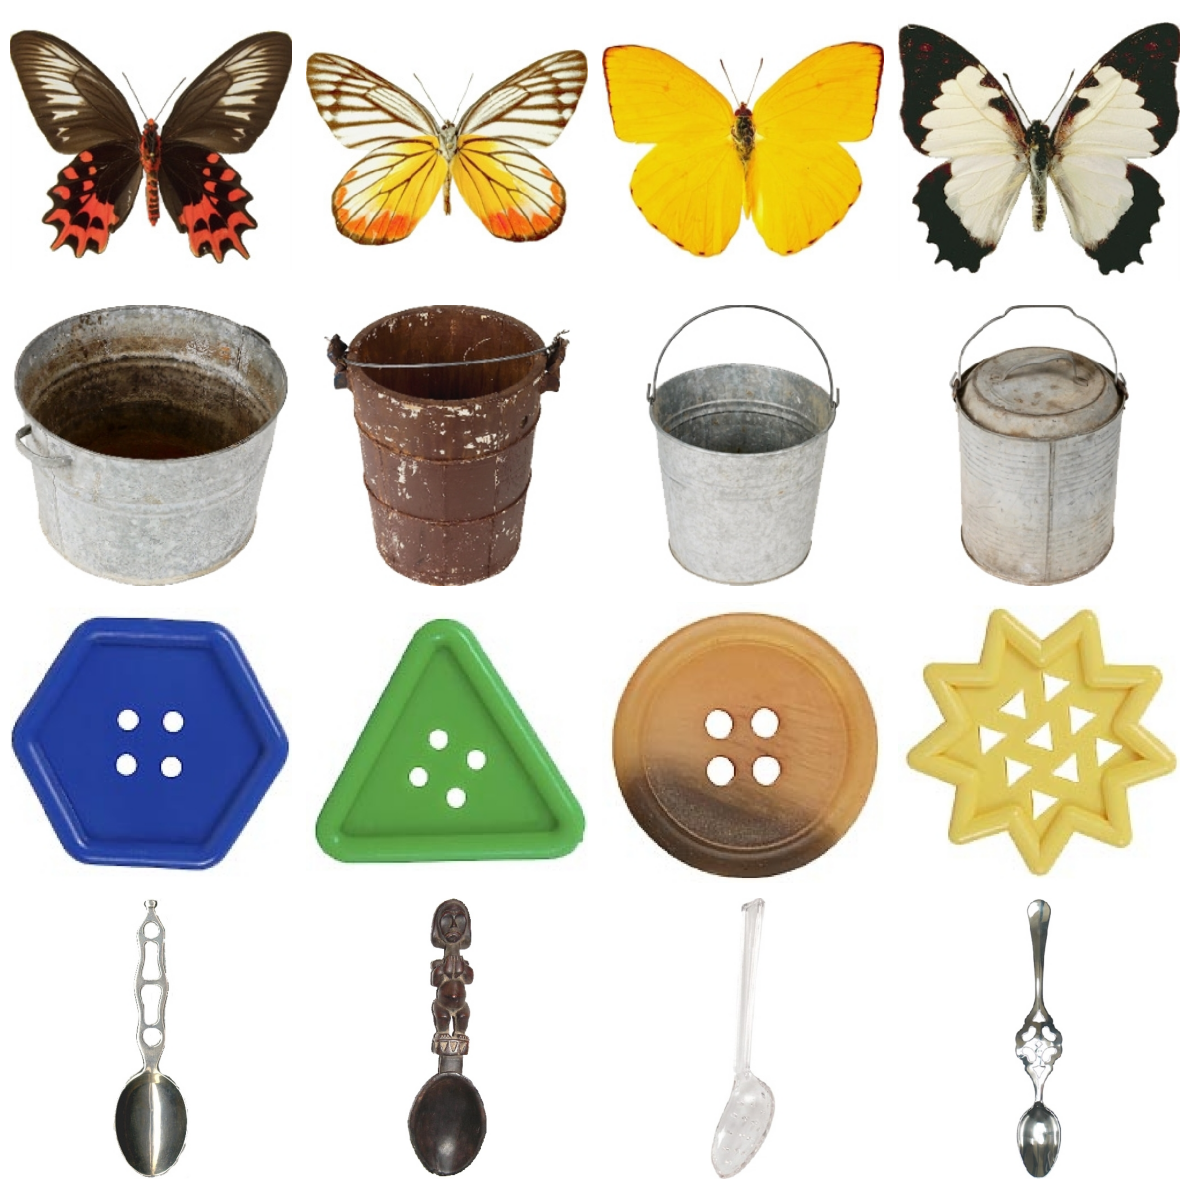

In [6]:
import matplotlib.pyplot as plt
import json

# Load class accuracies
class_accuracies = {'butterfly1': 0.8, 'butterfly2': 0.8, 'butterfly3': 0.0, 'butterfly4': 0.0, 'bucket5': 0.0, 'bucket6': 0.0, 'bucket7': 0.0, 'bucket8': 0.0, 'button9': 0.0, 'button10': 0.0, 'button11': 0.0, 'button12': 0.2, 'spoon13': 0.6, 'spoon14': 0.6, 'spoon15': 0.2, 'spoon16': 0.2}

# Load image filenames
with open('datasets/trials/gen_example.json', 'r') as file:
    image_data = json.load(file)
    image_filenames = {entry['target_category']: entry['target_img_filename'] for entry in image_data}

# Setup the plot
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.flatten()

# Plot each image with its score
for i, (class_name, accuracy) in enumerate(class_accuracies.items()):
    img_path = image_filenames[class_name]
    if not img_path.startswith('/'):  # Check if the path is already absolute
        img_path = f'datasets/trials/{img_path}'  # Correct the path
    img = plt.imread(img_path)  # Read the image
    axes[i].imshow(img)
    axes[i].set_title(f'{class_name}\nScore: {accuracy}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the JSON files
with open('results/trial_08-20_01:29.json') as file:
    data1 = json.load(file)

with open('results/trial_08-20_01:28.json') as file:
    data2 = json.load(file)

# Extract class accuracies
acc1 = data1['class_accuracy']
acc2 = data2['class_accuracy']

# Create DataFrame
df = pd.DataFrame({
    'Category': list(acc1.keys()),
    'Model1': list(acc1.values()),
    'Model2': list(acc2.values())
})

# Sort categories based on Model2's accuracy
df_sorted = df.sort_values(by='Model2', ascending=False)

# Splitting into two rows for clarity
half_size = len(df_sorted) // 2
df_top_half = df_sorted.iloc[:half_size]
df_bottom_half = df_sorted.iloc[half_size:]

# Function to plot each half
def plot_half(df_half, ax):
    ind = np.arange(len(df_half))
    width = 0.35
    rects1 = ax.bar(ind - width/2, df_half['Model1'], width, label='Model1')
    rects2 = ax.bar(ind + width/2, df_half['Model2'], width, label='Model2')

    ax.set_ylabel('Accuracy')
    ax.set_title('Class-wise Accuracy by Model')
    ax.set_xticks(ind)
    ax.set_xticklabels(df_half['Category'], rotation=90)
    ax.legend()

# Create plot with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
plot_half(df_top_half, ax1)
plot_half(df_bottom_half, ax2)

plt.tight_layout()
plt.savefig('/mnt/data/class_wise_accuracy_comparison_sorted.png')
plt.show()